In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
dt = pd.DataFrame({'X1':[2.7810836,1.4654893,3.3965616,1.3880701,3.0640723,7.6275312,5.3324412,6.9225967,8.6754186,7.6737564],
             'X2':[2.55053700,2.36212507,4.40029352,1.85022031,3.00530597,2.75926223,2.08862677,1.77106367,-0.2420686,3.50856301],
             'Y':[1,0,0,0,0,1,1,1,1,1]})
    

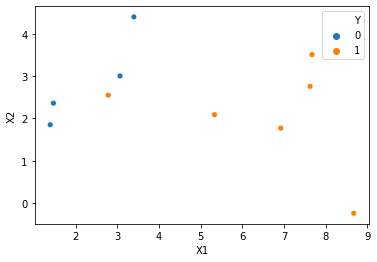

In [90]:
sns.scatterplot('X1','X2',hue='Y',data=dt)

In [106]:
model = LogisticRegression()

In [107]:
model.fit(dt[['X1']],dt['Y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
model.coef_

array([[0.9203184]])

In [109]:
model.intercept_

array([-3.41923622])

In [110]:
model.coef_[0][0]

0.9203183991010039

In [111]:
values = model.intercept_+model.coef_[0][0]*dt['X1']

In [112]:
dt.sort_values(by=['X1'],inplace=True)

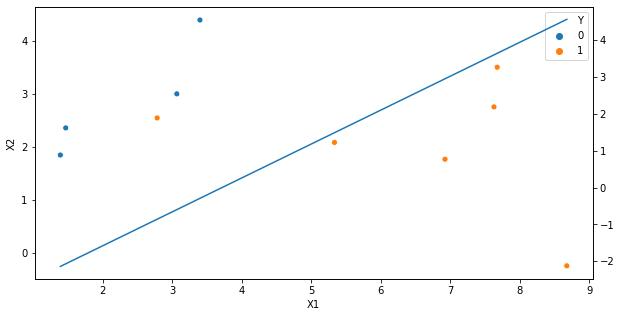

In [113]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot('X1','X2',hue='Y',data=dt)
ax2 = ax.twinx()
plt.plot(dt['X1'],values)

In [114]:
-3.41923622+(0.9203183991010039*2.781084)

-0.8597534453545839

In [100]:
model.coef_

array([[0.9203184]])

In [105]:
import math
(1/(1+(math.e**-0.8597534453545839)))

0.7026091394394695

In [ ]:
model.

In [102]:
dt

,X1,X2,Y
3,1.388070,1.850220,0
1,1.465489,2.362125,0
0,2.781084,2.550537,1
4,3.064072,3.005306,0
2,3.396562,4.400294,0
6,5.332441,2.088627,1
7,6.922597,1.771064,1
5,7.627531,2.759262,1
9,7.673756,3.508563,1
8,8.675419,-0.242069,1


In [115]:
model.predict(dt[['X1']])

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])